#  CNN Classification

## Description of the Task

The objective is to train a Convolutional Neural Network (CNN) to perform a binary classification task on the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The task involves grouping these images into two categories based on whether the object depicted in the image can fly or not:

- Can Fly (class 1): Includes images of birds and airplanes.
- Cannot Fly (class 0): Includes images of frogs, deer, trucks, automobiles, horses, ships, dogs, and cats.

The goal is to select an appropriate CNN architecture, loss function, and evaluation strategy to effectively classify the images into these two categories. The model's performance will be evaluated on a test set using metrics such as precision, recall, F1-score, and accuracy.Aconfusion matrix will be generated to provide a detailed breakdown of the model's performance.


## Data Preparation

We first load the CIFAR-10 dataset, which contains 60,000 images of 10 different classes.
Here, we modify the labels for binary classification based on whether the objects can fly or not.
Then, we preprocess the images by scaling the pixel values.


In [2]:

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Categories for 'can fly' (1) and 'cannot fly' (0)
can_fly = [0, 2]  # 0: airplane, 2: bird
cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # other categories

# Modify labels for binary classification
y_train_bin = np.isin(y_train.flatten(), can_fly).astype(int)
y_test_bin = np.isin(y_test.flatten(), can_fly).astype(int)

# One-hot encoding
y_train_bin = to_categorical(y_train_bin, 2)
y_test_bin = to_categorical(y_test_bin, 2)

# Preprocess data: scale images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255



## Build the CNN Architecture
We build a CNN model with specific layers configured for the classification task. The model includes convolutional layers, max pooling, dropout for regularization, and dense layers for classification.


In [3]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(2, activation='softmax')
])


C:\Users\pavnd\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



## Compile and Train the Model
We compile the model with the Adam optimizer and categorical crossentropy loss function. We then train the model on the training data and validate it using a subset.


In [4]:

from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_bin, epochs=30, batch_size=64, validation_split=0.15)


Epoch 1/30
665/665 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7315 - loss: 0.6299 - val_accuracy: 0.7185 - val_loss: 0.5641
Epoch 2/30
665/665 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.8377 - loss: 0.3861 - val_accuracy: 0.8433 - val_loss: 0.3916
Epoch 3/30
665/665 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.8584 - loss: 0.3412 - val_accuracy: 0.8580 - val_loss: 0.3363
Epoch 4/30
665/665 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.8723 - loss: 0.3114 - val_accuracy: 0.8708 - val_loss: 0.3097
Epoch 5/30
665/665 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.8758 - loss: 0.3061 - val_accuracy: 0.8323 - val_loss: 0.3820
Epoch 6/30
665/665 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.8810 - loss: 0.2912 - val_accuracy: 0.8909 - val_loss: 0.2780
Epoch 7/30
665/665 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.8833 - loss: 0.2821 - val_accuracy: 0.8620 - val_loss: 0.3627
Epoch 8/30
665/665 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.8765 - loss: 0.3029 - 


## Evaluate the Model
We evaluate the model on the test dataset and calculate additional metrics such as precision, recall, and F1-score.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
 [[7380  620]
 [ 450 1550]]


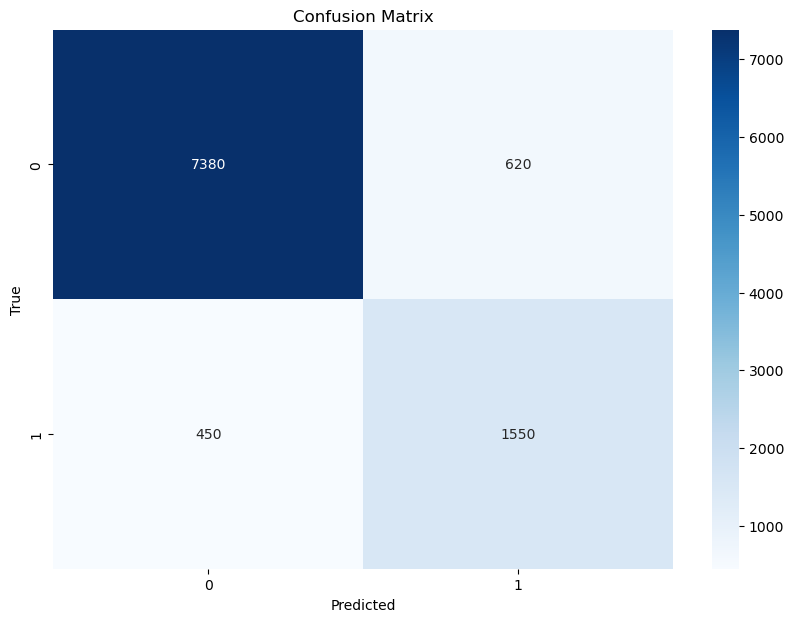


Classification Report:
               precision    recall  f1-score   support

  Cannot Fly       0.94      0.92      0.93      8000
     Can Fly       0.71      0.78      0.74      2000

    accuracy                           0.89     10000
   macro avg       0.83      0.85      0.84     10000
weighted avg       0.90      0.89      0.89     10000



In [10]:

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

# Predict the test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_bin, axis=1)

# Confusion matrix and classification report
cm = confusion_matrix(true_classes, predicted_classes)
report = classification_report(true_classes, predicted_classes, target_names=['Cannot Fly', 'Can Fly'])

print("Confusion Matrix:\n", cm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


print("\nClassification Report:\n", report)


## Analysis and Observations


##### Confusion Matrix Insights:



The confusion matrix shows that:
- 7380 "Cannot Fly" objects were correctly classified, while 620 were misclassified as "Can Fly".
- 1550 "Can Fly" objects were correctly classified, while 450 were misclassified as "Cannot Fly".

     This highlights a higher tendency to misclassify "Can Fly" objects as "Cannot Fly" compared to the reverse.

#####  Precision and Recall:

- The model exhibits higher precision (0.94) and recall (0.92) for the "Cannot Fly" category, which is likely due to the larger representation of this class in the dataset. This suggests that the model is highly effective at correctly identifying non-flying objects.

- The "Can Fly" category, while achieving a respectable recall of 0.78, has a lower precision of 0.71. This indicates that there are some false positives where the model incorrectly identifies non-flying objects as flying ones.

##### Class Imbalance Impact:



- The larger number of "Cannot Fly" instances (8000) compared to "Can Fly" instances (2000) may have influenced the model's performance, making it more proficient in identifying non-flying objects.

## Conclusion

The CNN model demonstrates solid performance in classifying CIFAR-10 images into "can fly" and "cannot fly" categories, particularly excelling in identifying non-flying objects. However, there is room for improvement in the precision of the "Can Fly" category. Future work could focus on:
- Addressing class imbalance through data augmentation or oversampling techniques.
- Experimenting with weighted loss functions to give more importance to the minority class.

Further tuning the model architecture and hyperparameters to enhance overall performance, especially for the "Can Fly" category